# Accessibility Indices

These indices measure how well aid can flow from source nodes (distribution centers) to terminal nodes (affected communities) in transportation networks.

#### 1. Global Efficiency (GE)

Measures how directly sources can reach terminals using shortest paths.

$$\mathcal{A}_{GE}(G, S, T) = \frac{1}{|S||T|} \sum_{s \in S} \sum_{t \in T} \frac{1}{d_{st}}$$

- $d_{st}$ = shortest distance from source $s$ to terminal $t$
- Higher values = better connectivity

#### 2. Number of Independent Paths (IP)

Counts alternative routes that don't share edges.

$$\mathcal{A}_{IP}(G, S, T) = \sum_{s \in S} \frac{1}{|T|} \sum_{t \in T} k(s,t)$$

- $k(s,t)$ = number of edge-disjoint paths between $s$ and $t$
- More paths = more redundancy = more resilient network

#### 3. Maximum Flow (MF)

Measures the average maximum flow capacity between sources and terminals.

$$\mathcal{A}_{MF}(G, S, T) = \frac{1}{|S||T|} \sum_{s \in S} \sum_{t \in T} f_{max}(s,t)$$

- $f_{max}(s,t)$ = maximum flow value from source $s$ to terminal $t$
- Edges must have a 'capacity' attribute
- Higher values = more total aid can be delivered

---

#### Key Property

An accessibility function $\mathcal{A}$ is **monotonically increasing** with respect to the edge set. 

Given a graph $G = (V, E, A)$ with source nodes $S$ and terminal nodes $T$, for any two edge subsets $E_1, E_2 \subseteq E$:

$$E_1 \subseteq E_2 \Rightarrow \mathcal{A}(G(V, E_1, A), S, T) \leq \mathcal{A}(G(V, E_2, A), S, T)$$

**Translation:** Removing edges (link disruptions) always decreases or maintains accessibility—never increases it. This property is fundamental for vulnerability analysis.

In [134]:
# We'll use 3 accessibility indices:
from src.accessibility_indices import global_efficiency, number_independent_paths, max_flow

# For constructing the transport network example and visualizing it
from src.utils import visualize_simple_graph
import networkx as nx

# Example Network

In [166]:
# Create a simple directed graph
G = nx.DiGraph()

# Add nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)

# Add edges with weights (distance) and capacity (# of trips)
edges = [
 ('A', 'B', {'weight': 1, 'capacity': 10}),
 ('A', 'C', {'weight': 2, 'capacity': 5}),
 ('B', 'D', {'weight': 1, 'capacity': 8}),
 ('C', 'E', {'weight': 2, 'capacity': 4}),
 ('D', 'F', {'weight': 1, 'capacity': 10}),
 ('E', 'F', {'weight': 1, 'capacity': 2}),
 ('B', 'E', {'weight': 3, 'capacity': 3}),
]
G.add_edges_from(edges)

# Define sources and terminals
sources = ['A']
terminals = ['F']


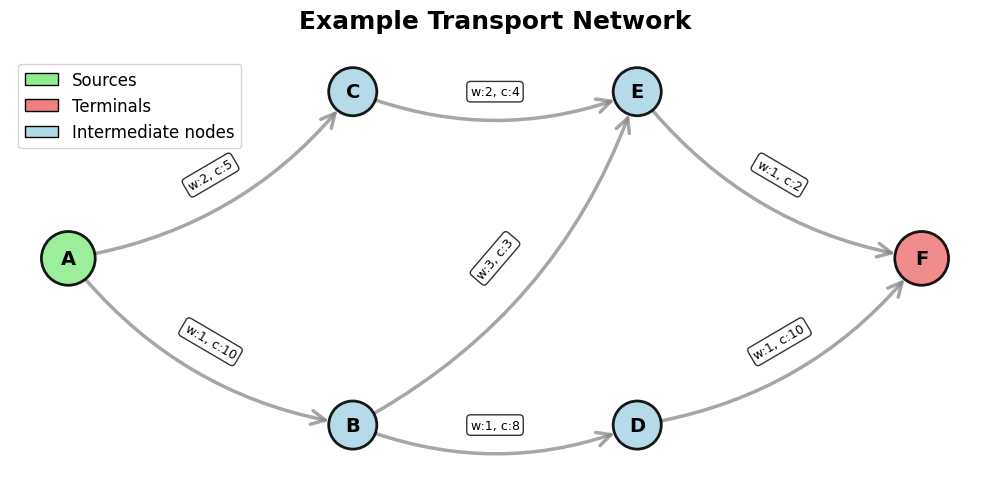

In [167]:
visualize_simple_graph(G, sources, terminals, title="Example Transport Network")

In [168]:
# The shortest path in G from "A" to "F" is 3. So Global Efficiency is 1/3 (using weight attributes on edges)
global_efficiency(G, sources, terminals)

0.3333333333333333

In [169]:
# There are 2 independent paths from "A" to "F"
number_independent_paths(G, sources, terminals)

2.0

In [170]:
# The max flow (# of trips) that can go from "A" to "F" is 10 (using capacity attributes on edges)
max_flow(G, sources, terminals)

10.0

## Disruption scenario

Suppose there is a natural disaster (e.g., landslide) from "D" to "F", so the link is no longer accessible:

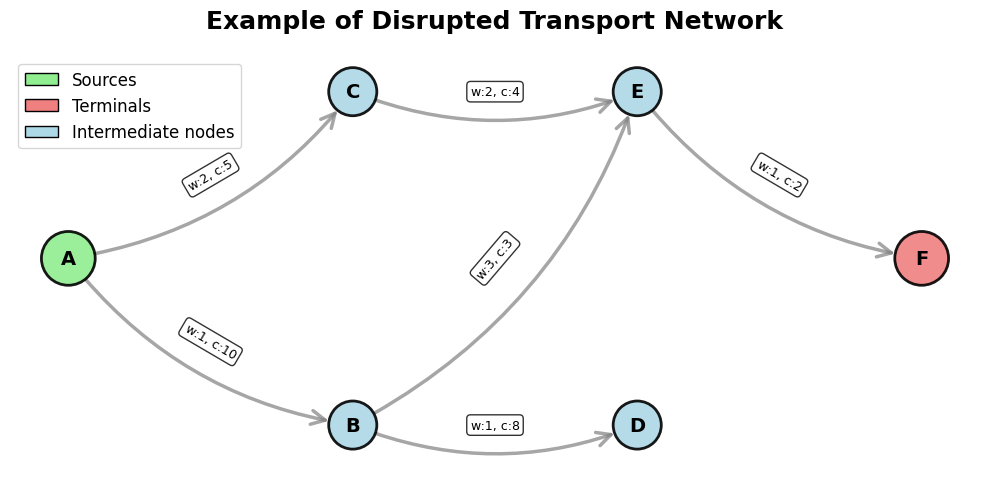

In [171]:
G2 = G.copy()
G2.remove_edge("D", "F")
visualize_simple_graph(G2, sources, terminals, title="Example of Disrupted Transport Network")

In [172]:
# The shortest path in G2 from "A" to "F" is 5. So Global Efficiency is 1/5 (using weight attribute of edges)
global_efficiency(G2, sources, terminals)

0.2

In [173]:
# There is just 1 independent path from "A" to "F" in G2. 
number_independent_paths(G2, sources, terminals)

1.0

In [174]:
# The max flow (# of trips) in G2 that can go from "A" to "F" is 2 (using capacity attribute of edges)
max_flow(G2, sources, terminals)

2.0

Note that $E_2 \subseteq E$ (the edges in $G_2$ are a subset of the original transport network $G$). Since all three accessibility indices satisfy the monotonicity property, the accessibility values for $G_2$ must be lower than or equal to those of $G$.

**In general:** When disasters occur (e.g., natural disasters, route blockages from protests), accessibility either decreases or remains constant—it never increases when links are removed.

**Key insight:** Different accessibility indices assign different importance to the same link. Even though we removed the same edge from the same network, the impact varies:

- Global Efficiency: 40% loss
- Number of Independent Paths: 50% loss  
- Maximum Flow: 83% loss

This demonstrates that link criticality is **metric-dependent**—a link that appears moderately important by one measure may be critical by another.